In [1]:
import pandas as pd                                #importing Libraries 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import metrics 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing 

In [2]:
data = pd.read_csv ('cardata.csv')              #reading the dataset 
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
df= pd.DataFrame (data)               #form a dataframe 
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Data Preprocessing

In [175]:
year1 = pd.DataFrame (df, columns= ['Year'])
year1.describe ()                                  #to understand the maximum Year of the car 

,Year
count,301.000000
mean,2013.627907
std,2.891554
min,2003.000000
25%,2012.000000
50%,2014.000000
75%,2016.000000
max,2018.000000


In [6]:
ages = []                               # a for loop to subtract years from the max year and calculates age_car
for i in year1['Year']:
    age = 2019 - i
    ages.append(age)

# add a column of Age to the dataframe 
year1['Age'] = ages

print(year1)

     Year  Age
0    2014    5
1    2013    6
2    2017    2
3    2011    8
4    2014    5
..    ...  ...
296  2016    3
297  2015    4
298  2009   10
299  2017    2
300  2016    3

[301 rows x 2 columns]


In [7]:
strings = pd.DataFrame (df, columns= ['Fuel_Type','Seller_Type','Transmission', 'Owner'])        #To give values for strings 
strings

,Fuel_Type,Seller_Type,Transmission,Owner
0,Petrol,Dealer,Manual,0
1,Diesel,Dealer,Manual,0
2,Petrol,Dealer,Manual,0
3,Petrol,Dealer,Manual,0
4,Diesel,Dealer,Manual,0
...,...,...,...,...
296,Diesel,Dealer,Manual,0
297,Petrol,Dealer,Manual,0
298,Petrol,Dealer,Manual,0
299,Diesel,Dealer,Manual,0


In [8]:
strings['Owner'] = strings['Owner'].apply(lambda x: x + 1)

In [9]:
for index, value in enumerate(strings['Fuel_Type']):          
    if value == 'Petrol': 
       strings.loc[index, 'Fuel_Type'] = 2.0                    # Petrol = 2 
    elif value == 'Diesel':
       strings.loc[index, 'Fuel_Type'] = 3.0                    # Diesel = 3 
    else: 
       strings.loc[index, 'Fuel_Type'] = 4.0                    #  CNG = 4

In [10]:
for index, value in enumerate(strings['Seller_Type']):
    if value == 'Dealer': 
       strings.loc[index, 'Seller_Type'] = 2.0                  # Dealer = 2 
    else: 
       strings.loc[index, 'Seller_Type'] = 3.0                  # Individual = 3

In [11]:
for index, value in enumerate(strings['Transmission']):
    if value == 'Manual': 
       strings.loc[index, 'Transmission'] = 2.0                 # Manual = 2 
    else: 
       strings.loc[index, 'Transmission'] = 3.0                 # Automatic = 3 
   
print(strings)

    Fuel_Type Seller_Type Transmission  Owner
0         2.0         2.0          2.0      1
1         3.0         2.0          2.0      1
2         2.0         2.0          2.0      1
3         2.0         2.0          2.0      1
4         3.0         2.0          2.0      1
..        ...         ...          ...    ...
296       3.0         2.0          2.0      1
297       2.0         2.0          2.0      1
298       2.0         2.0          2.0      1
299       3.0         2.0          2.0      1
300       2.0         2.0          2.0      1

[301 rows x 4 columns]


In [12]:
df.insert(1, 'Age_Car', year1.Age)
df

,Car_Name,Age_Car,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,5,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,6,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,8,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,5,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...,...
296,city,3,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,4,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,10,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [13]:
df2 = pd.DataFrame (df, columns= ['Age_Car','Year', 'Present_Price', 'Kms_Driven'])
df2

,Age_Car,Year,Present_Price,Kms_Driven
0,5,2014,5.59,27000
1,6,2013,9.54,43000
2,2,2017,9.85,6900
3,8,2011,4.15,5200
4,5,2014,6.87,42450
...,...,...,...,...
296,3,2016,11.60,33988
297,4,2015,5.90,60000
298,10,2009,11.00,87934
299,2,2017,12.50,9000


In [14]:
df3= pd.concat([df2, strings], axis=1)
df3

,Age_Car,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,2014,5.59,27000,2.0,2.0,2.0,1
1,6,2013,9.54,43000,3.0,2.0,2.0,1
2,2,2017,9.85,6900,2.0,2.0,2.0,1
3,8,2011,4.15,5200,2.0,2.0,2.0,1
4,5,2014,6.87,42450,3.0,2.0,2.0,1
...,...,...,...,...,...,...,...,...
296,3,2016,11.60,33988,3.0,2.0,2.0,1
297,4,2015,5.90,60000,2.0,2.0,2.0,1
298,10,2009,11.00,87934,2.0,2.0,2.0,1
299,2,2017,12.50,9000,3.0,2.0,2.0,1


In [15]:
df3.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age_Car        301 non-null    int64  
 1   Year           301 non-null    int64  
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 18.9+ KB


In [16]:
  # columns to convert to float
columns_to_convert = ['Age_Car', 'Year', 'Kms_Driven', 'Fuel_Type' , 'Seller_Type', 'Transmission', 'Owner']

df3[columns_to_convert] = df3[columns_to_convert].astype(float)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age_Car        301 non-null    float64
 1   Year           301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    float64
 4   Fuel_Type      301 non-null    float64
 5   Seller_Type    301 non-null    float64
 6   Transmission   301 non-null    float64
 7   Owner          301 non-null    float64
dtypes: float64(8)
memory usage: 18.9 KB


In [17]:
df4= pd.DataFrame (df, columns= ['Selling_Price'])          # Making the Target
df4

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


# Noise and NaN Recognition 

In [18]:
df5= pd.concat([df3, df4], axis=1)            # Making a plottable dataframe 
df5

,Age_Car,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,5.0,2014.0,5.59,27000.0,2.0,2.0,2.0,1.0,3.35
1,6.0,2013.0,9.54,43000.0,3.0,2.0,2.0,1.0,4.75
2,2.0,2017.0,9.85,6900.0,2.0,2.0,2.0,1.0,7.25
3,8.0,2011.0,4.15,5200.0,2.0,2.0,2.0,1.0,2.85
4,5.0,2014.0,6.87,42450.0,3.0,2.0,2.0,1.0,4.60
...,...,...,...,...,...,...,...,...,...
296,3.0,2016.0,11.60,33988.0,3.0,2.0,2.0,1.0,9.50
297,4.0,2015.0,5.90,60000.0,2.0,2.0,2.0,1.0,4.00
298,10.0,2009.0,11.00,87934.0,2.0,2.0,2.0,1.0,3.35
299,2.0,2017.0,12.50,9000.0,3.0,2.0,2.0,1.0,11.50


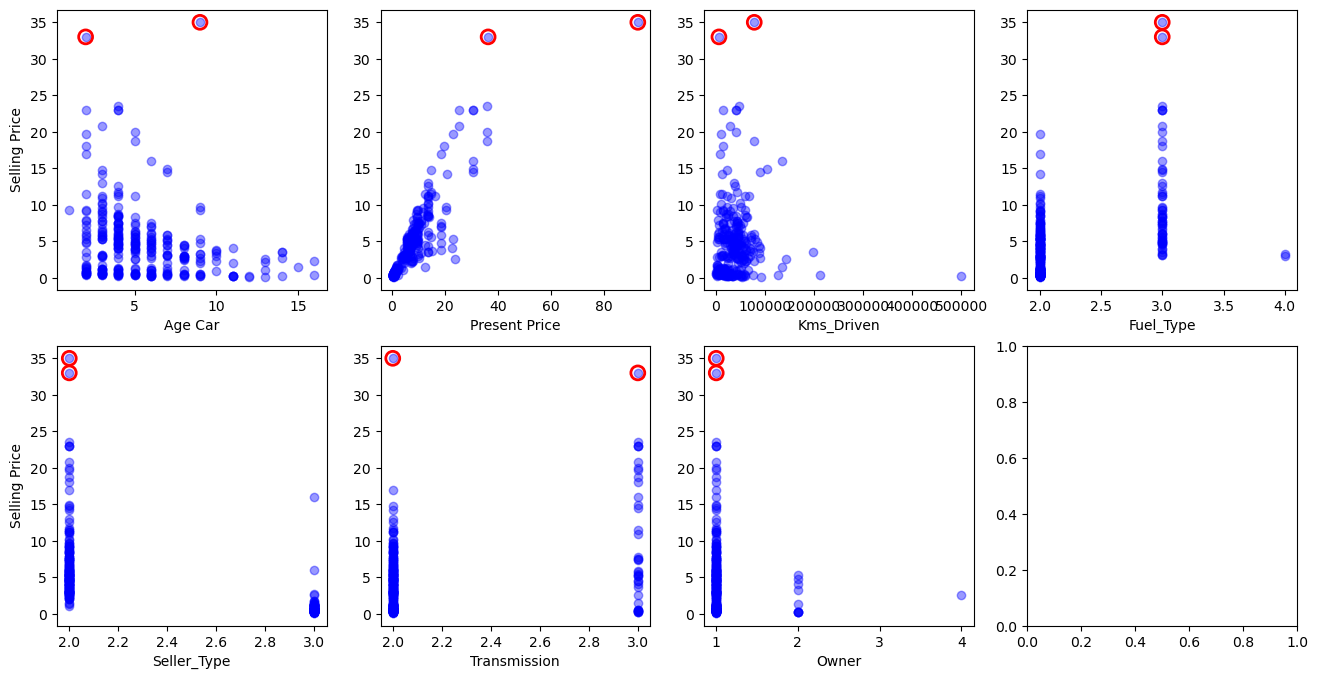

In [177]:

# Create a figure with 8 subplots in 2 rows and 4 columns #NOISE RECOGNITION 
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

# Plot each feature against 'Selling_Price'
axs[0, 0].scatter(df5['Age_Car'], df5['Selling_Price'], color='blue', linewidth=1, alpha=0.4)
axs[0, 0].set_xlabel('Age Car')
axs[0, 0].set_ylabel('Selling Price')

axs[0, 1].scatter(df5['Present_Price'], df5['Selling_Price'], color='blue', linewidth=1, alpha=0.4)
axs[0, 1].set_xlabel('Present Price')

axs[0, 2].scatter(df5['Kms_Driven'], df5['Selling_Price'], color='blue', linewidth=1, alpha=0.4)
axs[0, 2].set_xlabel('Kms_Driven')

axs[0, 3].scatter(df5['Fuel_Type'], df5['Selling_Price'], color='blue', linewidth=1, alpha=0.4)
axs[0, 3].set_xlabel('Fuel_Type')

axs[1, 0].scatter(df5['Seller_Type'], df5['Selling_Price'], color='blue', linewidth=1, alpha=0.4)
axs[1, 0].set_xlabel('Seller_Type')
axs[1, 0].set_ylabel('Selling Price')

axs[1, 1].scatter(df5['Transmission'], df5['Selling_Price'], color='blue', linewidth=1, alpha=0.4)
axs[1, 1].set_xlabel('Transmission')

axs[1, 2].scatter(df5['Owner'], df5['Selling_Price'], color='blue', linewidth=1, alpha=0.4)
axs[1, 2].set_xlabel('Owner')

# Plot circles around data points with 'Selling_Price' larger than 30
for ax in axs.flatten():
    if ax.collections:  # Check if the subplot has any scatter plot
        x = ax.collections[0].get_offsets()[:, 0]
        y = ax.collections[0].get_offsets()[:, 1]
        indices = df5['Selling_Price'] > 30
        ax.scatter(x[indices], y[indices], color='red', s=100, facecolors='none', edgecolors='red', linewidths=2)

plt.show()


<font color='red'>**Red circles show noises**</font>

In [20]:
df5_noise = df5[(30 < df5["Selling_Price"])]    # finding indexes of noises 
df5_noise

,Age_Car,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
64,2.0,2017.0,36.23,6000.0,3.0,2.0,3.0,1.0,33.0
86,9.0,2010.0,92.60,78000.0,3.0,2.0,2.0,1.0,35.0


In [21]:
df5_afternoise = df5.drop(df5_noise.index)    # extracting the noises of the data by having their indeces 
df5_afternoise

,Age_Car,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,5.0,2014.0,5.59,27000.0,2.0,2.0,2.0,1.0,3.35
1,6.0,2013.0,9.54,43000.0,3.0,2.0,2.0,1.0,4.75
2,2.0,2017.0,9.85,6900.0,2.0,2.0,2.0,1.0,7.25
3,8.0,2011.0,4.15,5200.0,2.0,2.0,2.0,1.0,2.85
4,5.0,2014.0,6.87,42450.0,3.0,2.0,2.0,1.0,4.60
...,...,...,...,...,...,...,...,...,...
296,3.0,2016.0,11.60,33988.0,3.0,2.0,2.0,1.0,9.50
297,4.0,2015.0,5.90,60000.0,2.0,2.0,2.0,1.0,4.00
298,10.0,2009.0,11.00,87934.0,2.0,2.0,2.0,1.0,3.35
299,2.0,2017.0,12.50,9000.0,3.0,2.0,2.0,1.0,11.50


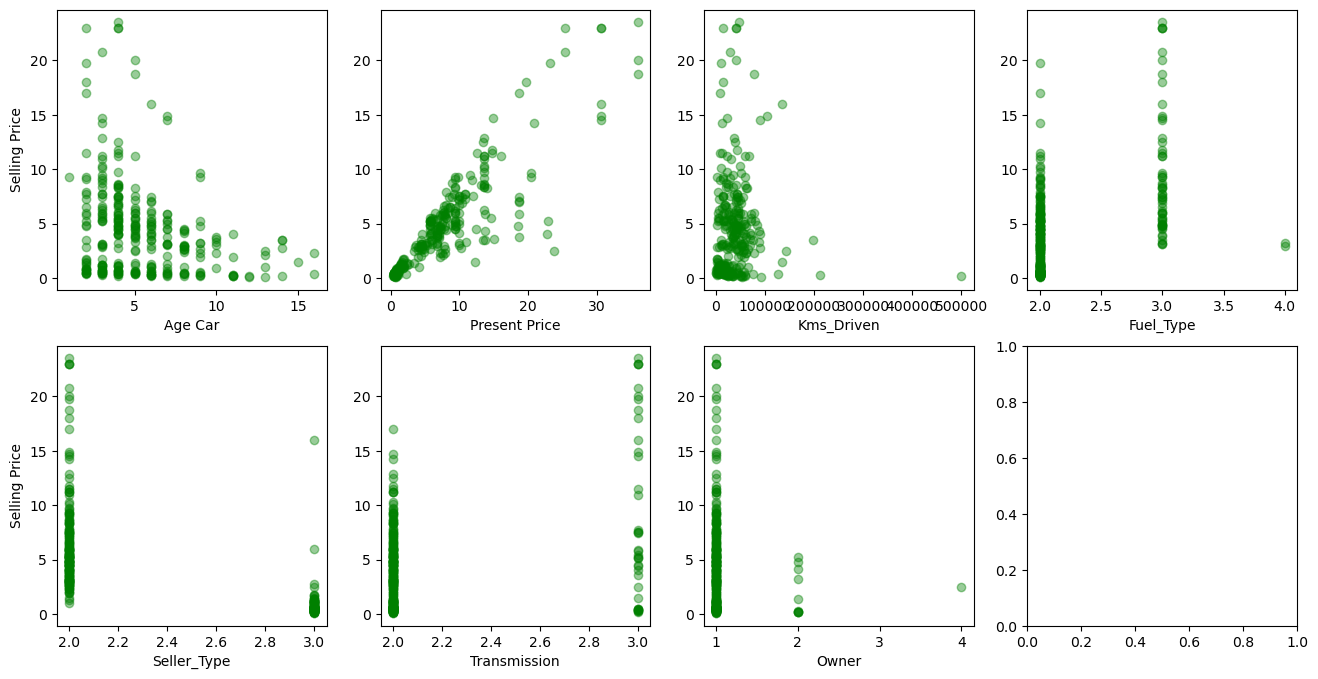

In [22]:
# Create a figure with 8 subplots arranged in 2 rows and 4 columns
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

axs[0, 0].scatter(df5_afternoise['Age_Car'], df5_afternoise['Selling_Price'], color='green', linewidth=1, alpha=0.4)
axs[0, 0].set_xlabel('Age Car')
axs[0, 0].set_ylabel('Selling Price')

axs[0, 1].scatter(df5_afternoise['Present_Price'], df5_afternoise['Selling_Price'], color='green', linewidth=1, alpha=0.4)
axs[0, 1].set_xlabel('Present Price')

axs[0, 2].scatter(df5_afternoise['Kms_Driven'], df5_afternoise['Selling_Price'], color='green', linewidth=1, alpha=0.4)
axs[0, 2].set_xlabel('Kms_Driven')

axs[0, 3].scatter(df5_afternoise['Fuel_Type'], df5_afternoise['Selling_Price'], color='green', linewidth=1, alpha=0.4)
axs[0, 3].set_xlabel('Fuel_Type')

axs[1, 0].scatter(df5_afternoise['Seller_Type'], df5_afternoise['Selling_Price'], color='green', linewidth=1, alpha=0.4)
axs[1, 0].set_xlabel('Seller_Type')
axs[1, 0].set_ylabel('Selling Price')

axs[1, 1].scatter(df5_afternoise['Transmission'], df5_afternoise['Selling_Price'], color='green', linewidth=1, alpha=0.4)
axs[1, 1].set_xlabel('Transmission')

axs[1, 2].scatter(df5_afternoise['Owner'], df5_afternoise['Selling_Price'], color='green', linewidth=1, alpha=0.4)
axs[1, 2].set_xlabel('Owner')

# Show the plot
plt.show()

<font color='green'>**Noises are removed**</font>

In [23]:
df5_afternoise.describe()                    # describing data after noise for MISSING VALUES 

,Age_Car,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,5.371237,2013.628763,7.248629,36913.408027,2.207358,2.354515,2.130435,1.043478,4.465050
std,2.887018,2.887018,6.935676,38903.318401,0.422297,0.479168,0.337346,0.248720,4.492894
min,1.000000,2003.000000,0.320000,500.000000,2.000000,2.000000,2.000000,1.000000,0.100000
25%,3.000000,2012.000000,1.200000,15000.000000,2.000000,2.000000,2.000000,1.000000,0.850000
50%,5.000000,2014.000000,6.100000,32000.000000,2.000000,2.000000,2.000000,1.000000,3.510000
75%,7.000000,2016.000000,9.840000,48383.500000,2.000000,3.000000,2.000000,1.000000,6.000000
max,16.000000,2018.000000,35.960000,500000.000000,4.000000,3.000000,3.000000,4.000000,23.500000


In [24]:
df5_afternoise.dropna (inplace = True)         # removing missing values if present 

In [25]:
DF = df5_afternoise                            # information on data and their types 
DF.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age_Car        299 non-null    float64
 1   Year           299 non-null    float64
 2   Present_Price  299 non-null    float64
 3   Kms_Driven     299 non-null    float64
 4   Fuel_Type      299 non-null    float64
 5   Seller_Type    299 non-null    float64
 6   Transmission   299 non-null    float64
 7   Owner          299 non-null    float64
 8   Selling_Price  299 non-null    float64
dtypes: float64(9)
memory usage: 23.4 KB


In [26]:
features = DF.drop(labels=['Selling_Price', 'Year'], axis=1)         # Forming the input features dataframe 
features

,Age_Car,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5.0,5.59,27000.0,2.0,2.0,2.0,1.0
1,6.0,9.54,43000.0,3.0,2.0,2.0,1.0
2,2.0,9.85,6900.0,2.0,2.0,2.0,1.0
3,8.0,4.15,5200.0,2.0,2.0,2.0,1.0
4,5.0,6.87,42450.0,3.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...
296,3.0,11.60,33988.0,3.0,2.0,2.0,1.0
297,4.0,5.90,60000.0,2.0,2.0,2.0,1.0
298,10.0,11.00,87934.0,2.0,2.0,2.0,1.0
299,2.0,12.50,9000.0,3.0,2.0,2.0,1.0


# Normalizing #

In [27]:
scaler = preprocessing.MinMaxScaler(feature_range = (0, 1))

Norm = scaler.fit_transform(features)
Norm_DF = pd.DataFrame (Norm, columns = ['Age_Car','Present_Price', 'Kms_Driven', 
                                         'Fuel_Type', 'Seller_Type', 'Transmission','Owner'])
Norm_DF

,Age_Car,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,0.266667,0.147868,0.053053,0.0,0.0,0.0,0.0
1,0.333333,0.258698,0.085085,0.5,0.0,0.0,0.0
2,0.066667,0.267396,0.012813,0.0,0.0,0.0,0.0
3,0.466667,0.107464,0.009409,0.0,0.0,0.0,0.0
4,0.266667,0.183782,0.083984,0.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...
294,0.133333,0.316498,0.067043,0.5,0.0,0.0,0.0
295,0.200000,0.156566,0.119119,0.0,0.0,0.0,0.0
296,0.600000,0.299663,0.175043,0.0,0.0,0.0,0.0
297,0.066667,0.341751,0.017017,0.5,0.0,0.0,0.0


# Correlation #

In [28]:
comp1 = np.corrcoef (Norm_DF.Age_Car , DF.Selling_Price)                  #Getting correlation between features and target 
comp2 = np.corrcoef (Norm_DF.Present_Price , DF.Selling_Price)
comp3 = np.corrcoef (Norm_DF.Kms_Driven , DF.Selling_Price)
comp4 = np.corrcoef (Norm_DF.Fuel_Type , DF.Selling_Price)
comp5 = np.corrcoef (Norm_DF.Seller_Type ,DF.Selling_Price)
comp6 = np.corrcoef (Norm_DF.Transmission , DF.Selling_Price)
comp7 = np.corrcoef (Norm_DF.Owner , DF.Selling_Price)
print('Age of Car Corr is:', comp1)
print ('\n Present Price Corr is:', comp2)
print ('\n Kms Driven Corr is:', comp3)
print ('\n Fuel Type Corr is:', comp4)
print ('\n Seller Type Corr is:', comp5)
print ('\n Transmission Corr is:', comp6)
print ('\n Owner Corr is:', comp7)

Age of Car Corr is: [[ 1.         -0.27312736]
 [-0.27312736  1.        ]]

 Present Price Corr is: [[1.         0.88035844]
 [0.88035844 1.        ]]

 Kms Driven Corr is: [[1.         0.02611443]
 [0.02611443 1.        ]]

 Fuel Type Corr is: [[1.         0.50278332]
 [0.50278332 1.        ]]

 Seller Type Corr is: [[ 1.         -0.59383598]
 [-0.59383598  1.        ]]

 Transmission Corr is: [[1.         0.37563801]
 [0.37563801 1.        ]]

 Owner Corr is: [[ 1.         -0.09262764]
 [-0.09262764  1.        ]]


In [29]:
DATA = Norm_DF.copy()                  # Form a dataframe for HEATMAP correlation between features
selprice = DF.Selling_Price 
DATA.insert(7, 'Sell_Price', selprice)
DATA.corr()

,Age_Car,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Sell_Price
Age_Car,1.000000,0.024282,0.520899,-0.055095,0.040386,0.012134,0.183071,-0.090744
Present_Price,0.024282,1.000000,0.222983,0.454030,-0.600807,0.421225,0.019682,0.685976
Kms_Driven,0.520899,0.222983,1.000000,0.167606,-0.101256,0.173079,0.089639,0.105422
Fuel_Type,-0.055095,0.454030,0.167606,1.000000,-0.347922,0.068618,-0.054174,0.407426
Seller_Type,0.040386,-0.600807,-0.101256,-0.347922,1.000000,-0.058669,0.123646,-0.565644
Transmission,0.012134,0.421225,0.173079,0.068618,-0.058669,1.000000,0.052166,0.218792
Owner,0.183071,0.019682,0.089639,-0.054174,0.123646,0.052166,1.000000,-0.107491
Sell_Price,-0.090744,0.685976,0.105422,0.407426,-0.565644,0.218792,-0.107491,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

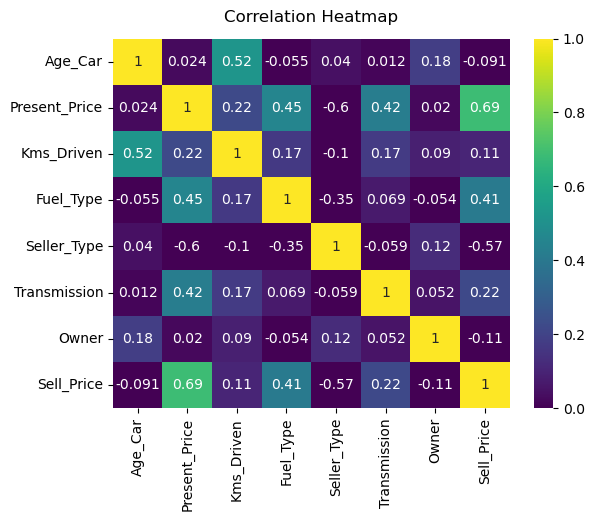

In [30]:
import seaborn as sns                       # correlation Heatmap 
Heatmap = sns.heatmap(DATA.corr(), vmin=0, vmax=1, annot=True, cmap= 'viridis')
Heatmap.set_title('Correlation Heatmap', pad=12)

# Regression Model 

In [31]:
x = pd.DataFrame (Norm_DF)                       # the initial regression Model 

In [32]:
y = DF['Selling_Price'].values.reshape(-1, 1)

In [33]:
x_train, x_test, y_train, y_test = train_test_split (x , y , test_size = 0.2, random_state = 0)

In [34]:
regressor = LinearRegression ()

In [35]:
regressor.fit (x_train, y_train)

y_pred = regressor.predict (x_test)
y_pred1 = np.maximum(y_pred, 0)


In [36]:
result_1 = regressor.score (x_test,  y_test)          # Evaluating the R2Score of the model 
print (result_1)

0.7984980244226987


# sorting over the most Important Feature and visulaize the scatter Plot

In [37]:
x_test.insert (7, "y_test", y_test)
x_test.insert (8, "y_pred", y_pred1)
x_test

,Age_Car,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,y_test,y_pred
206,0.066667,0.218294,0.005876,0.0,0.0,0.0,0.000000,7.90,6.515113
188,0.666667,0.012065,0.119119,0.0,1.0,0.0,0.000000,0.20,0.000000
12,0.200000,0.269921,0.029029,0.0,0.0,1.0,0.000000,7.50,7.031605
219,0.333333,0.181538,0.063063,0.0,0.0,1.0,0.000000,4.50,4.421077
237,0.400000,0.115320,0.046464,0.0,0.0,0.0,0.000000,2.00,2.679683
136,0.133333,0.015432,0.029029,0.0,1.0,0.0,0.000000,0.60,1.439607
228,0.333333,0.254770,0.089089,0.5,0.0,0.0,0.000000,6.15,6.352256
205,0.200000,0.150954,0.068663,0.0,0.0,1.0,0.000000,5.15,4.366981
52,0.066667,0.545735,0.029029,0.5,0.0,1.0,0.000000,18.00,14.026481
108,0.133333,0.040965,0.011011,0.0,1.0,0.0,0.000000,1.20,2.099945


In [38]:
x_test.describe()

,Age_Car,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,y_test,y_pred
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.303333,0.209828,0.082222,0.133333,0.316667,0.283333,0.011111,4.929667,5.042617
std,0.198079,0.195734,0.128610,0.222974,0.469102,0.454420,0.060340,4.733696,4.203949
min,0.000000,0.005331,0.001602,0.000000,0.000000,0.000000,0.000000,0.170000,0.000000
25%,0.133333,0.032898,0.029029,0.000000,0.000000,0.000000,0.000000,1.062500,1.806015
50%,0.266667,0.196268,0.064493,0.000000,0.000000,0.000000,0.000000,4.275000,4.651290
75%,0.400000,0.269080,0.097598,0.500000,1.000000,1.000000,0.000000,6.725000,6.797266
max,0.866667,1.000000,1.000000,0.500000,1.000000,1.000000,0.333333,23.000000,21.427406


In [39]:
test_sorted = x_test.sort_values (by= ['Present_Price'])
test_sorted

,Age_Car,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,y_test,y_pred
153,0.066667,0.005331,0.007608,0.0,1.0,1.0,0.000000,0.48,2.061596
176,0.266667,0.005612,0.037037,0.0,1.0,1.0,0.000000,0.35,0.910991
194,0.666667,0.005612,1.000000,0.0,1.0,1.0,0.000000,0.17,0.000000
184,0.533333,0.005612,0.043043,0.0,1.0,1.0,0.000000,0.25,0.000000
188,0.666667,0.012065,0.119119,0.0,1.0,0.0,0.000000,0.20,0.000000
182,0.666667,0.012065,0.051051,0.0,1.0,0.0,0.333333,0.25,0.000000
190,0.733333,0.012065,0.097097,0.0,1.0,0.0,0.333333,0.20,0.000000
173,0.466667,0.013103,0.149149,0.0,1.0,0.0,0.000000,0.38,0.000000
139,0.133333,0.013468,0.039039,0.0,1.0,0.0,0.000000,0.60,1.308617
129,0.200000,0.014029,0.035035,0.0,1.0,0.0,0.000000,0.75,1.062562


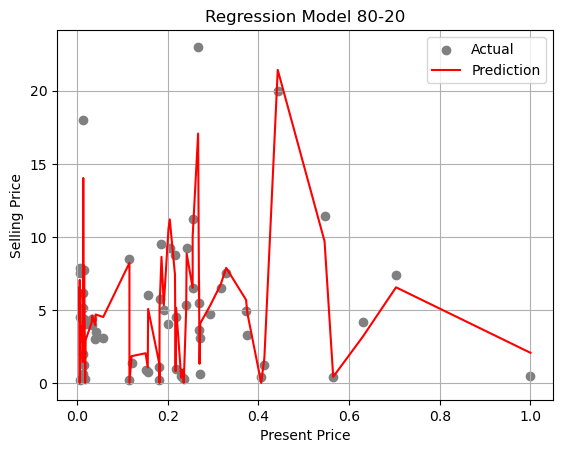

In [40]:
plt.scatter (test_sorted.Present_Price, y_test, color='gray')   #Visualization first Regression Model with 0.7984980244226987
plt.plot (test_sorted.Present_Price, y_pred1 , color='red')
plt.xlabel ('Present Price')
plt.ylabel ('Selling Price')
plt.title ('Regression Model 80-20')
plt.legend(['Actual', 'Prediction'])
plt.grid ()
plt.show()


In [41]:
print (regressor.intercept_)          # Getting the Regression Formula 
print (regressor.coef_)

[2.6507965]
[[-4.41178732 19.30000201 -9.2989753   2.16686469 -0.65085045  0.3236224
  -3.42197553]]


In [42]:
Compare = pd.DataFrame ({'Actual':y_test.flatten(), 'Predicted': y_pred.flatten ()})         # comparing y_test vs. y_predict
Compare

,Actual,Predicted
0,7.90,6.515113
1,0.20,-1.816075
2,7.50,7.031605
3,4.50,4.421077
4,2.00,2.679683
5,0.60,1.439607
6,6.15,6.352256
7,5.15,4.366981
8,18.00,14.026481
9,1.20,2.099945


In [43]:
print ('Mean Absolute Error:', metrics.mean_absolute_error (y_test, y_pred))          # Model Evaluation 
print ('Mean Squared Error:', metrics.mean_squared_error (y_test, y_pred))
print ('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error (y_test, y_pred)))
print ('R2 Score:', metrics.r2_score (y_test, y_pred))

Mean Absolute Error: 1.2600544963644926
Mean Squared Error: 4.439977123291135
Root Mean Squared Error: 2.1071253221607718
R2 Score: 0.7984980244226987


**The model's R2 score is not high enough. Therfore this model is not predicting well**

# Changing the train-test size 

**test-train = 70-30**

In [44]:
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split (x , y , test_size = 0.3, random_state = 0)

In [45]:
regressor_s = LinearRegression ()

In [46]:
regressor_s.fit (x_train_s, y_train_s)
y_pred_s = regressor_s.predict (x_test_s)

In [47]:
result__s = regressor_s.score (x_test_s, y_test_s)
print (result__s)      # getting better score for 70-30 tarin test------------ for 80-20 it was 0.7984980244226987

0.8371520810303842


**Test_Train 90-10**

In [48]:
x_train_s2, x_test_s2, y_train_s2, y_test_s2 = train_test_split (x , y , test_size = 0.1, random_state = 0)
regressor_s2 = LinearRegression ()
regressor_s2.fit (x_train_s2, y_train_s2)
y_pred_s2 = regressor_s2.predict (x_test_s2)
result__s2 = regressor_s2.score (x_test_s2, y_test_s2)
print (result__s2)                          # the score of 0.5960236932411055 is not good

0.5960236932411055


<font color='blue'>**So, it seems that the best train-test size is 70-30**</font>   

**70-30 ------------ 0.8371520810303845**   ///

**80-20 ------------ 0.798498024422698**   ///

**90-10 ------------ 0.5960236932411054**  ///

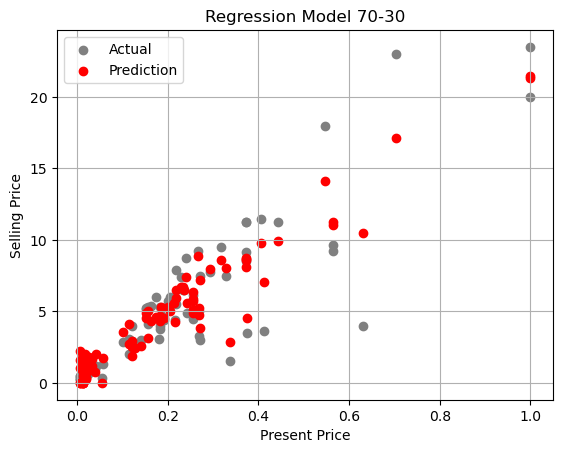

In [49]:
y_pred_sizepos = np.maximum(y_pred_s, 0)                          # Visualizing the 70-30 Model 
plt.scatter (x_test_s.Present_Price, y_test_s, color='gray')
plt.scatter (x_test_s.Present_Price, y_pred_sizepos , color='red')
plt.xlabel ('Present Price')
plt.ylabel ('Selling Price')
plt.title ('Regression Model 70-30')
plt.legend(['Actual', 'Prediction'])
plt.grid ()
plt.show()


# Changing the functions in Regression Model 

<font color='orange'>**Add Logarithmic feature of Age_car to the model**</font>

In [50]:
y_pred2 = (2.6507965 + 
         (-4.41178732 * np.log(Norm_DF.Age_Car)) +     #Logarithmic Transformation 
         (19.30000201 * Norm_DF.Present_Price) + 
         (-9.2989753 * Norm_DF.Kms_Driven) + 
         (2.16686469 * Norm_DF.Fuel_Type) + 
         (-0.65085045 * Norm_DF.Seller_Type) + 
         (0.3236224 * Norm_DF.Transmission) + 
         (-3.42197553 * Norm_DF.Owner)
          )
y_pred2 = np.maximum(y_pred2, 0)


C:\Users\Sara\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [51]:
Log_Age = np.log(Norm_DF.Age_Car)
Log_Age_pos = np.maximum(Log_Age, 0)     #Ln function can return negative values

Norm_DF2 = Norm_DF.copy()
Norm_DF2.insert(1, 'LogAge', Log_Age_pos)
#Norm_DF2.drop(['Age_Car'], axis=1, inplace=True) #first I droped it and second I kept the linear and logarithmic functions both, which showed better score for the model
Norm_DF2

,Age_Car,LogAge,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,0.266667,0.0,0.147868,0.053053,0.0,0.0,0.0,0.0
1,0.333333,0.0,0.258698,0.085085,0.5,0.0,0.0,0.0
2,0.066667,0.0,0.267396,0.012813,0.0,0.0,0.0,0.0
3,0.466667,0.0,0.107464,0.009409,0.0,0.0,0.0,0.0
4,0.266667,0.0,0.183782,0.083984,0.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
294,0.133333,0.0,0.316498,0.067043,0.5,0.0,0.0,0.0
295,0.200000,0.0,0.156566,0.119119,0.0,0.0,0.0,0.0
296,0.600000,0.0,0.299663,0.175043,0.0,0.0,0.0,0.0
297,0.066667,0.0,0.341751,0.017017,0.5,0.0,0.0,0.0


In [52]:
x2 =  pd.DataFrame (Norm_DF2)

In [53]:
y2 =  DF['Selling_Price'].values.reshape(-1, 1)

In [54]:
x2_train, x2_test, y2_train, y2_test = train_test_split (x2 , y2, test_size = 0.3, random_state = 0)

In [55]:
regressor2 = LinearRegression ()

In [56]:
regressor2.fit (x2_train, y2_train)

LinearRegression()

In [57]:
y_pred2 = regressor2.predict (x2_test)

In [58]:
result_2 = regressor2.score (x2_test,  y2_test)    # The score of model considering the logaritymic function over Age_car
print (result_2)

0.8371520810303843


**result_2 = 0.8371520810303843   vs.    result_1 = 0.8371520810303842**

So, logarithmic function doesn't change the model score 

<font color='orange'>**Add Quadratic Form to the present_Price feature**</font>

In [59]:
y_pred2 = (2.6507965 + 
         (-4.41178732 * Norm_DF.Age_Car) +     
         (19.30000201 * (Norm_DF.Present_Price)**2) +  #Present_Price is #MOST Correlated-> x2 function  
         (-9.2989753 * Norm_DF.Kms_Driven) + 
         (2.16686469 * Norm_DF.Fuel_Type) + 
         (-0.65085045 * Norm_DF.Seller_Type) + 
         (0.3236224 * Norm_DF.Transmission) + 
         (-3.42197553 * Norm_DF.Owner)
          )
y_pred2 = np.maximum(y_pred2, 0)


In [60]:
Price2 = (Norm_DF.Present_Price)**2                # Addition of the parameter to the dataframe
Norm_DF3 = Norm_DF.copy()
Norm_DF3.insert(2, 'price2', Price2)
Norm_DF3

,Age_Car,Present_Price,price2,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,0.266667,0.147868,0.021865,0.053053,0.0,0.0,0.0,0.0
1,0.333333,0.258698,0.066925,0.085085,0.5,0.0,0.0,0.0
2,0.066667,0.267396,0.071501,0.012813,0.0,0.0,0.0,0.0
3,0.466667,0.107464,0.011548,0.009409,0.0,0.0,0.0,0.0
4,0.266667,0.183782,0.033776,0.083984,0.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
294,0.133333,0.316498,0.100171,0.067043,0.5,0.0,0.0,0.0
295,0.200000,0.156566,0.024513,0.119119,0.0,0.0,0.0,0.0
296,0.600000,0.299663,0.089798,0.175043,0.0,0.0,0.0,0.0
297,0.066667,0.341751,0.116794,0.017017,0.5,0.0,0.0,0.0


In [61]:
x3 =  pd.DataFrame (Norm_DF3)
y3 =  DF['Selling_Price'].values.reshape(-1, 1)
x3_train, x3_test, y3_train, y3_test = train_test_split (x3 , y3, test_size = 0.3, random_state = 0)
regressor3 = LinearRegression ()
regressor3.fit (x3_train, y3_train)
y_pred3 = regressor3.predict (x3_test)
result_3 = regressor3.score (x3_test,  y3_test)
print (result_3)                                     # The score of model considering Price^2 

0.8371550095785036


<font color='orange'>**Add Cubic Form to the present_Price feature**</font>

In [62]:
Price3 = (Norm_DF.Present_Price)**3
Norm_DF3_1 = Norm_DF3.copy()
Norm_DF3_1.insert(3, 'price3', Price3)
Norm_DF3_1

,Age_Car,Present_Price,price2,price3,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,0.266667,0.147868,0.021865,0.003233,0.053053,0.0,0.0,0.0,0.0
1,0.333333,0.258698,0.066925,0.017313,0.085085,0.5,0.0,0.0,0.0
2,0.066667,0.267396,0.071501,0.019119,0.012813,0.0,0.0,0.0,0.0
3,0.466667,0.107464,0.011548,0.001241,0.009409,0.0,0.0,0.0,0.0
4,0.266667,0.183782,0.033776,0.006207,0.083984,0.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
294,0.133333,0.316498,0.100171,0.031704,0.067043,0.5,0.0,0.0,0.0
295,0.200000,0.156566,0.024513,0.003838,0.119119,0.0,0.0,0.0,0.0
296,0.600000,0.299663,0.089798,0.026909,0.175043,0.0,0.0,0.0,0.0
297,0.066667,0.341751,0.116794,0.039914,0.017017,0.5,0.0,0.0,0.0


In [63]:
x3_1 =  pd.DataFrame (Norm_DF3_1)
y3_1 =  DF['Selling_Price'].values.reshape(-1, 1)
x31_train, x31_test, y31_train, y31_test = train_test_split (x3_1 , y3_1, test_size = 0.3, random_state = 0)
regressor31 = LinearRegression ()
regressor31.fit (x31_train, y31_train)
y_pred31 = regressor31.predict (x31_test)
result_31 = regressor31.score (x31_test,  y31_test)
print (result_31)                                           # Price^3 decreased the score 

0.8367839740414917


**The score is decreasing** So keep the Present Price with power 2

<font color='orange'>**Add Log Funcion for selling_price feature**</font>

In [64]:
Log_price = np.log(Norm_DF.Present_Price)
Log_price_pos = np.maximum(Log_price, 0) 
Norm_DF4 = Norm_DF3.copy()
Norm_DF4.insert(3, 'Logprice', Log_price_pos)
Norm_DF4

C:\Users\Sara\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Age_Car,Present_Price,price2,Logprice,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,0.266667,0.147868,0.021865,0.0,0.053053,0.0,0.0,0.0,0.0
1,0.333333,0.258698,0.066925,0.0,0.085085,0.5,0.0,0.0,0.0
2,0.066667,0.267396,0.071501,0.0,0.012813,0.0,0.0,0.0,0.0
3,0.466667,0.107464,0.011548,0.0,0.009409,0.0,0.0,0.0,0.0
4,0.266667,0.183782,0.033776,0.0,0.083984,0.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
294,0.133333,0.316498,0.100171,0.0,0.067043,0.5,0.0,0.0,0.0
295,0.200000,0.156566,0.024513,0.0,0.119119,0.0,0.0,0.0,0.0
296,0.600000,0.299663,0.089798,0.0,0.175043,0.0,0.0,0.0,0.0
297,0.066667,0.341751,0.116794,0.0,0.017017,0.5,0.0,0.0,0.0


In [65]:
x4 =  pd.DataFrame (Norm_DF4)
y4 =  DF['Selling_Price'].values.reshape(-1, 1)
x4_train, x4_test, y4_train, y4_test = train_test_split (x4 , y4, test_size = 0.3, random_state = 0)
regressor4 = LinearRegression ()
regressor4.fit (x4_train, y4_train)
y_pred4 = regressor4.predict (x4_test)
result_4 = regressor4.score (x4_test,  y4_test)
print (result_4)

0.8371550095785032


**Log_price  = 0.8371550095785032   vs. 

previous with price^2  = 0.8371550095785036**


Therefore log function is not good 


<font color='orange'>**Add quadratic form for seller_Type feature**</font>

In [66]:
seller2 = (Norm_DF.Seller_Type)**2
Norm_DF_seller = Norm_DF3.copy()
Norm_DF_seller.insert(6, 'Seller2', seller2)
Norm_DF_seller

,Age_Car,Present_Price,price2,Kms_Driven,Fuel_Type,Seller_Type,Seller2,Transmission,Owner
0,0.266667,0.147868,0.021865,0.053053,0.0,0.0,0.0,0.0,0.0
1,0.333333,0.258698,0.066925,0.085085,0.5,0.0,0.0,0.0,0.0
2,0.066667,0.267396,0.071501,0.012813,0.0,0.0,0.0,0.0,0.0
3,0.466667,0.107464,0.011548,0.009409,0.0,0.0,0.0,0.0,0.0
4,0.266667,0.183782,0.033776,0.083984,0.5,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
294,0.133333,0.316498,0.100171,0.067043,0.5,0.0,0.0,0.0,0.0
295,0.200000,0.156566,0.024513,0.119119,0.0,0.0,0.0,0.0,0.0
296,0.600000,0.299663,0.089798,0.175043,0.0,0.0,0.0,0.0,0.0
297,0.066667,0.341751,0.116794,0.017017,0.5,0.0,0.0,0.0,0.0


In [67]:
x_4_1 =  pd.DataFrame (Norm_DF_seller)
y_4_1 =  DF['Selling_Price'].values.reshape(-1, 1)
x_4_1_train, x_4_1_test, y_4_1_train, y_4_1_test = train_test_split (x_4_1 , y_4_1, test_size = 0.3, random_state = 0)
regressor_4_1 = LinearRegression ()
regressor_4_1.fit (x_4_1_train, y_4_1_train)
y_pred_4_1 = regressor_4_1.predict (x_4_1_test)
result_4_1 = regressor_4_1.score (x_4_1_test,  y_4_1_test)
print (result_4_1)                                                 # Score not changed 

0.8371550095785032


<font color='orange'>**More features of less effective parameters : Fuel_Type and Transmission**</font>

In [68]:
Fuel2 = (Norm_DF.Fuel_Type)**2                 # Quadratic for Fuel_Type 
Norm_DF5 = Norm_DF3.copy()
Norm_DF5.insert(5, 'Fuel2', Fuel2)
Norm_DF5

,Age_Car,Present_Price,price2,Kms_Driven,Fuel_Type,Fuel2,Seller_Type,Transmission,Owner
0,0.266667,0.147868,0.021865,0.053053,0.0,0.00,0.0,0.0,0.0
1,0.333333,0.258698,0.066925,0.085085,0.5,0.25,0.0,0.0,0.0
2,0.066667,0.267396,0.071501,0.012813,0.0,0.00,0.0,0.0,0.0
3,0.466667,0.107464,0.011548,0.009409,0.0,0.00,0.0,0.0,0.0
4,0.266667,0.183782,0.033776,0.083984,0.5,0.25,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
294,0.133333,0.316498,0.100171,0.067043,0.5,0.25,0.0,0.0,0.0
295,0.200000,0.156566,0.024513,0.119119,0.0,0.00,0.0,0.0,0.0
296,0.600000,0.299663,0.089798,0.175043,0.0,0.00,0.0,0.0,0.0
297,0.066667,0.341751,0.116794,0.017017,0.5,0.25,0.0,0.0,0.0


In [69]:
x5 =  pd.DataFrame (Norm_DF5)
y5 =  DF['Selling_Price'].values.reshape(-1, 1)
x5_train, x5_test, y5_train, y5_test = train_test_split (x5 , y5, test_size = 0.3, random_state = 0)
regressor5 = LinearRegression ()
regressor5.fit (x5_train, y5_train)
y_pred5 = regressor5.predict (x5_test)
result_5 = regressor5.score (x5_test,  y5_test)
print (result_5)                                 # Not a better result 

0.8338983018134248


**No increase in model prediction**

<font color='orange'>**Add features of Transmission**</font>

In [70]:
Trans2 = (Norm_DF.Transmission)**2             # Quadratic form for Transmission
Norm_DF6 = Norm_DF3.copy()
Norm_DF6.insert(7, 'Trans2', Trans2)
Norm_DF6

,Age_Car,Present_Price,price2,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Trans2,Owner
0,0.266667,0.147868,0.021865,0.053053,0.0,0.0,0.0,0.0,0.0
1,0.333333,0.258698,0.066925,0.085085,0.5,0.0,0.0,0.0,0.0
2,0.066667,0.267396,0.071501,0.012813,0.0,0.0,0.0,0.0,0.0
3,0.466667,0.107464,0.011548,0.009409,0.0,0.0,0.0,0.0,0.0
4,0.266667,0.183782,0.033776,0.083984,0.5,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
294,0.133333,0.316498,0.100171,0.067043,0.5,0.0,0.0,0.0,0.0
295,0.200000,0.156566,0.024513,0.119119,0.0,0.0,0.0,0.0,0.0
296,0.600000,0.299663,0.089798,0.175043,0.0,0.0,0.0,0.0,0.0
297,0.066667,0.341751,0.116794,0.017017,0.5,0.0,0.0,0.0,0.0


In [71]:
x6 =  pd.DataFrame (Norm_DF6)
y6 =  DF['Selling_Price'].values.reshape(-1, 1)
x6_train, x6_test, y6_train, y6_test = train_test_split (x6 , y6, test_size = 0.3, random_state = 0)
regressor6 = LinearRegression ()
regressor6.fit (x6_train, y6_train)
y_pred6 = regressor6.predict (x6_test)
result_6 = regressor6.score (x6_test,  y6_test)
print (result_6)                                     # Not a better score 

0.8371550095785034


**Not Effective Again*

# Effect of multiple Features

<font color='orange'>**Present_Price * Seller_Type**</font>

<font color='brown'>Two features with maximum correlation </font>

In [148]:
PrSel = (Norm_DF3.Present_Price)*(Norm_DF3.Seller_Type)
Norm_DF7 = Norm_DF3.copy()
Norm_DF7.insert(8, 'Price_SellerType', PrSel)
Norm_DF7

,Age_Car,Present_Price,price2,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Price_SellerType
0,0.266667,0.147868,0.021865,0.053053,0.0,0.0,0.0,0.0,0.0
1,0.333333,0.258698,0.066925,0.085085,0.5,0.0,0.0,0.0,0.0
2,0.066667,0.267396,0.071501,0.012813,0.0,0.0,0.0,0.0,0.0
3,0.466667,0.107464,0.011548,0.009409,0.0,0.0,0.0,0.0,0.0
4,0.266667,0.183782,0.033776,0.083984,0.5,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
294,0.133333,0.316498,0.100171,0.067043,0.5,0.0,0.0,0.0,0.0
295,0.200000,0.156566,0.024513,0.119119,0.0,0.0,0.0,0.0,0.0
296,0.600000,0.299663,0.089798,0.175043,0.0,0.0,0.0,0.0,0.0
297,0.066667,0.341751,0.116794,0.017017,0.5,0.0,0.0,0.0,0.0


In [149]:
x7 =  pd.DataFrame (Norm_DF7)
y7 =  DF['Selling_Price'].values.reshape(-1, 1)
x7_train, x7_test, y7_train, y7_test = train_test_split (x7 , y7, test_size = 0.3, random_state =0)
regressor7 = LinearRegression ()
regressor7.fit (x7_train, y7_train)
y_pred7 = regressor7.predict (x7_test)
result_7 = regressor7.score (x7_test,  y7_test)
print (result_7)                                 # Showing better Score - So keep it

0.8425765619054132


<font color='orange'>**Present_Price * Fuel_Type**</font>

In [150]:
PrFu = (Norm_DF3.Present_Price)*(Norm_DF3.Fuel_Type)
Norm_DF8 = Norm_DF3.copy()
Norm_DF8.insert(8, 'Price_FuelType', PrFu)
Norm_DF8

,Age_Car,Present_Price,price2,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Price_FuelType
0,0.266667,0.147868,0.021865,0.053053,0.0,0.0,0.0,0.0,0.000000
1,0.333333,0.258698,0.066925,0.085085,0.5,0.0,0.0,0.0,0.129349
2,0.066667,0.267396,0.071501,0.012813,0.0,0.0,0.0,0.0,0.000000
3,0.466667,0.107464,0.011548,0.009409,0.0,0.0,0.0,0.0,0.000000
4,0.266667,0.183782,0.033776,0.083984,0.5,0.0,0.0,0.0,0.091891
...,...,...,...,...,...,...,...,...,...
294,0.133333,0.316498,0.100171,0.067043,0.5,0.0,0.0,0.0,0.158249
295,0.200000,0.156566,0.024513,0.119119,0.0,0.0,0.0,0.0,0.000000
296,0.600000,0.299663,0.089798,0.175043,0.0,0.0,0.0,0.0,0.000000
297,0.066667,0.341751,0.116794,0.017017,0.5,0.0,0.0,0.0,0.170875


In [151]:
x8 =  pd.DataFrame (Norm_DF8)
y8 =  DF['Selling_Price'].values.reshape(-1, 1)
x8_train, x8_test, y8_train, y8_test = train_test_split (x8 , y8, test_size = 0.3, random_state =0)
regressor8 = LinearRegression ()
regressor8.fit (x8_train, y8_train)
y_pred8 = regressor8.predict (x8_test)
result_8 = regressor8.score (x8_test,  y8_test)
print (result_8)                                   # Better score -> so keeping this 

0.8496334529483989


<font color='orange'>**Present_Price * Transmission**</font>

In [152]:
PrTr = (Norm_DF3.Present_Price)*(Norm_DF3.Transmission)
Norm_DF9 = Norm_DF3.copy()
Norm_DF9.insert(8, 'Price*Trans', PrTr)
Norm_DF9

,Age_Car,Present_Price,price2,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Price*Trans
0,0.266667,0.147868,0.021865,0.053053,0.0,0.0,0.0,0.0,0.0
1,0.333333,0.258698,0.066925,0.085085,0.5,0.0,0.0,0.0,0.0
2,0.066667,0.267396,0.071501,0.012813,0.0,0.0,0.0,0.0,0.0
3,0.466667,0.107464,0.011548,0.009409,0.0,0.0,0.0,0.0,0.0
4,0.266667,0.183782,0.033776,0.083984,0.5,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
294,0.133333,0.316498,0.100171,0.067043,0.5,0.0,0.0,0.0,0.0
295,0.200000,0.156566,0.024513,0.119119,0.0,0.0,0.0,0.0,0.0
296,0.600000,0.299663,0.089798,0.175043,0.0,0.0,0.0,0.0,0.0
297,0.066667,0.341751,0.116794,0.017017,0.5,0.0,0.0,0.0,0.0


In [153]:
x9 =  pd.DataFrame (Norm_DF9)
y9 =  DF['Selling_Price'].values.reshape(-1, 1)
x9_train, x9_test, y9_train, y9_test = train_test_split (x9 , y9, test_size = 0.3, random_state =0)
regressor9 = LinearRegression ()
regressor9.fit (x9_train, y9_train)
y_pred9 = regressor9.predict (x9_test)
result_9 = regressor9.score (x9_test,  y9_test)
print (result_9)                                     # The score got worse 

0.8111823985652312


<font color='orange'>**Present_Price  *  Seller_Type  *  Fuel_Type**</font>

In [154]:
PrSelFu = (Norm_DF3.Present_Price)*(Norm_DF3.Seller_Type)*(Norm_DF3.Fuel_Type)
Norm_DF10 = Norm_DF3.copy()
Norm_DF10.insert(8, 'Price*SellerType*FuelType', PrSelFu)
Norm_DF10

,Age_Car,Present_Price,price2,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Price*SellerType*FuelType
0,0.266667,0.147868,0.021865,0.053053,0.0,0.0,0.0,0.0,0.0
1,0.333333,0.258698,0.066925,0.085085,0.5,0.0,0.0,0.0,0.0
2,0.066667,0.267396,0.071501,0.012813,0.0,0.0,0.0,0.0,0.0
3,0.466667,0.107464,0.011548,0.009409,0.0,0.0,0.0,0.0,0.0
4,0.266667,0.183782,0.033776,0.083984,0.5,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
294,0.133333,0.316498,0.100171,0.067043,0.5,0.0,0.0,0.0,0.0
295,0.200000,0.156566,0.024513,0.119119,0.0,0.0,0.0,0.0,0.0
296,0.600000,0.299663,0.089798,0.175043,0.0,0.0,0.0,0.0,0.0
297,0.066667,0.341751,0.116794,0.017017,0.5,0.0,0.0,0.0,0.0


In [155]:
x10 =  pd.DataFrame (Norm_DF10)
y10 =  DF['Selling_Price'].values.reshape(-1, 1)
x10_train, x10_test, y10_train, y10_test = train_test_split (x10 , y10, test_size = 0.3, random_state =0)
regressor10 = LinearRegression ()
regressor10.fit (x10_train, y10_train)
y_pred10 = regressor10.predict (x10_test)
result_10 = regressor10.score (x10_test,  y10_test)
print (result_10)                                      # Not a considerable improvement 

0.8352304340958618


In [156]:
Norm_DF11 = Norm_DF7.copy()   #having effect of present_price *seller_Type
Norm_DF11.insert(9, 'price_Fuel', Norm_DF8['Present_Price'] * Norm_DF8['Fuel_Type'])
Norm_DF11

,Age_Car,Present_Price,price2,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Price_SellerType,price_Fuel
0,0.266667,0.147868,0.021865,0.053053,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.333333,0.258698,0.066925,0.085085,0.5,0.0,0.0,0.0,0.0,0.129349
2,0.066667,0.267396,0.071501,0.012813,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.466667,0.107464,0.011548,0.009409,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.266667,0.183782,0.033776,0.083984,0.5,0.0,0.0,0.0,0.0,0.091891
...,...,...,...,...,...,...,...,...,...,...
294,0.133333,0.316498,0.100171,0.067043,0.5,0.0,0.0,0.0,0.0,0.158249
295,0.200000,0.156566,0.024513,0.119119,0.0,0.0,0.0,0.0,0.0,0.000000
296,0.600000,0.299663,0.089798,0.175043,0.0,0.0,0.0,0.0,0.0,0.000000
297,0.066667,0.341751,0.116794,0.017017,0.5,0.0,0.0,0.0,0.0,0.170875


In [157]:
x11 =  pd.DataFrame (Norm_DF11)                      # Forming the dataframe out of the best features on model score 
y11 =  DF['Selling_Price'].values.reshape(-1, 1)
x11_train, x11_test, y11_train, y11_test = train_test_split (x11 , y11, test_size = 0.3, random_state =0)
regressor11 = LinearRegression ()
regressor11.fit (x11_train, y11_train)
y_pred11 = regressor11.predict (x11_test)
result_11 = regressor11.score (x11_test,  y11_test)
print (result_11)

0.8586919042997707


In [158]:
Norm_DF12 = Norm_DF11.copy ()                               # dropping two ineffective features 
Norm_DF12.drop(columns=[ 'Kms_Driven', 'Owner'], inplace=True)
Norm_DF12

,Age_Car,Present_Price,price2,Fuel_Type,Seller_Type,Transmission,Price_SellerType,price_Fuel
0,0.266667,0.147868,0.021865,0.0,0.0,0.0,0.0,0.000000
1,0.333333,0.258698,0.066925,0.5,0.0,0.0,0.0,0.129349
2,0.066667,0.267396,0.071501,0.0,0.0,0.0,0.0,0.000000
3,0.466667,0.107464,0.011548,0.0,0.0,0.0,0.0,0.000000
4,0.266667,0.183782,0.033776,0.5,0.0,0.0,0.0,0.091891
...,...,...,...,...,...,...,...,...
294,0.133333,0.316498,0.100171,0.5,0.0,0.0,0.0,0.158249
295,0.200000,0.156566,0.024513,0.0,0.0,0.0,0.0,0.000000
296,0.600000,0.299663,0.089798,0.0,0.0,0.0,0.0,0.000000
297,0.066667,0.341751,0.116794,0.5,0.0,0.0,0.0,0.170875


In [159]:
x12 =  pd.DataFrame (Norm_DF12)
y12 =  DF['Selling_Price'].values.reshape(-1, 1)
x12_train, x12_test, y12_train, y12_test = train_test_split (x12 , y12, test_size = 0.3, random_state =0)
regressor12 = LinearRegression ()
regressor12.fit (x12_train, y12_train)
y_pred12 = regressor12.predict (x12_test)
result_12 = regressor12.score (x12_test,  y12_test)
print (result_12)                              # Considerable improvement in the model score 

0.9151164727255476


<font color='blue'> the best score is 0.9151164727255476</font>


# Visualizing and Evaluating the Final Regression Model Prediction 

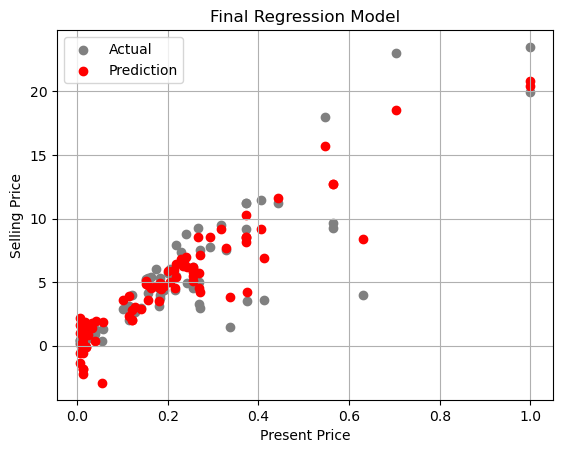

In [84]:
plt.scatter (x12_test.Present_Price, y12_test, color='gray')
plt.scatter (x12_test.Present_Price, y_pred12 , color='red')
plt.xlabel ('Present Price')
plt.ylabel ('Selling Price')
plt.title ('Final Regression Model')
plt.legend(['Actual', 'Prediction'])
plt.grid ()
plt.show()


In [85]:
x12_test.insert (7, "y12_test", y12_test)        # Addition of y_test and y_pred & Sorting the dataset over Present_Price 
x12_test.insert (8, "y_pred12", y_pred12)
data_sorted = x12_test.sort_values (by= ['Present_Price'])

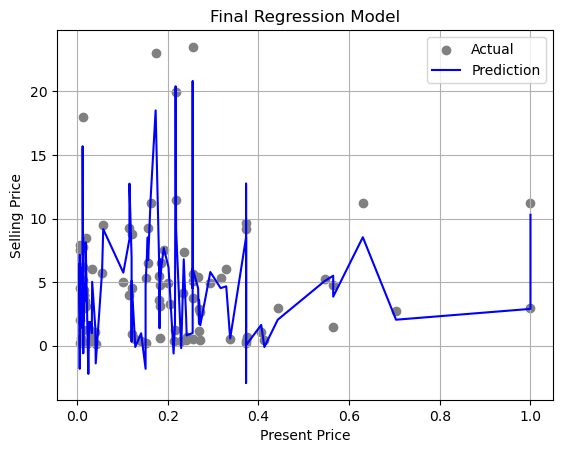

In [86]:
plt.scatter (data_sorted.Present_Price, y12_test, color='gray')
plt.plot (data_sorted.Present_Price, y_pred12 , color='blue')
plt.xlabel ('Present Price')
plt.ylabel ('Selling Price')
plt.title ('Final Regression Model')
plt.legend(['Actual', 'Prediction'])
plt.grid ()
plt.show()

In [87]:
print (regressor12.intercept_)            # getting coefficients and intercept of the Regression Model 
print (regressor12.coef_)

[1.92275561]
[[ -5.9233662   25.99964915 -16.4892908   -4.98086373  -0.04915503
    0.56375365  -4.71053394  24.95155398]]


<font color='green'>*y= 1.92275561 + (-5.9233662 * Age_Car) +  
    (25.99964915 * Present_Price) + (-16.4892908 * (Present_Price)^2) +
    ( -4.98086373 * Fuel_Type)  + ( -0.04915503 * Seller_Type)+
    ( 0.56375365 * Transmission) + ( -4.71053394 * Present_Price*Seller_Type)+ 
    ( 24.95155398 * Present_Price*Fuel_Type)* </font>


In [88]:
Compare_model = pd.DataFrame ({'Actual':y12_test.flatten(), 'Predicted': y_pred12.flatten ()})   #Comparison on model response vs actual data
Compare_model

,Actual,Predicted
0,7.90,6.417681
1,0.20,-1.820855
2,7.50,7.118329
3,4.50,4.688548
4,2.00,2.332400
...,...,...
85,1.50,3.855308
86,11.25,8.531428
87,2.70,2.043009
88,3.00,2.894387


In [89]:
print ('Mean Absolute Error:', metrics.mean_absolute_error (y12_test, y_pred12))    # Model Evaluation 
print ('Mean Squared Error:', metrics.mean_squared_error (y12_test, y_pred12))
print ('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error (y12_test, y_pred12)))
print ('R2 Score:', metrics.r2_score (y12_test, y_pred12))
metrics_df = pd.DataFrame({
    'Metric': ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R2 Score'],
    'Value': [metrics.mean_absolute_error (y12_test, y_pred12), metrics.mean_squared_error (y12_test, y_pred12),
              np.sqrt(metrics.mean_squared_error (y12_test, y_pred12)), metrics.r2_score (y12_test, y_pred12)]
})

# Display the DataFrame
display(metrics_df)

Mean Absolute Error: 0.9925332497978332
Mean Squared Error: 1.8951330577829508
Root Mean Squared Error: 1.3766383177083772
R2 Score: 0.9151164727255476


,Metric,Value
0,Mean Absolute Error,0.992533
1,Mean Squared Error,1.895133
2,Root Mean Squared Error,1.376638
3,R2 Score,0.915116


# Cross Validation

In [90]:
x_cv = pd.DataFrame (Norm_DF12)  #DF12 has the best features 
y_cv = DF['Selling_Price'].values.reshape (-1,1)

In [91]:
x_train_cv, x_test_cv, y_train_cv, y_test_cv = train_test_split (x_cv , y_cv , test_size = 0.3, random_state = 0)

In [92]:
model_cv = LinearRegression ()         
kfold_validation = KFold (4)
results_cv = cross_val_score (model_cv, x_cv, y_cv, cv=kfold_validation)
print (results_cv)
print (np.mean(results_cv))

[0.86266073 0.82665589 0.62438065 0.8186667 ]
0.7830909926991736


**k = 4 folds show the best average score** 

In [93]:
model_cv.fit (x_train_cv, y_train_cv)                  # model score without cross-validation is better 
pred_cv = model_cv.score (x_test_cv,y_test_cv)
pred_cv

0.9151164727255476

# Simple Hold out Method 

In [184]:
fold_3_index = 0                      # Index of fold number 3 for example 
for fold_index, (train_indices, test_indices) in enumerate(kfold_validation.split(x_cv)):
    if fold_index == fold_3_index:
        x_train11, x_test11 = x_cv.iloc[train_indices], x_cv.iloc[test_indices]
        y_train11, y_test11 = y_cv[train_indices], y_cv[test_indices]
        break
model_cv = LinearRegression ()
model_cv.fit(x_train11, y_train11)
test_score = model_cv.score(x_test11, y_test11)
print("model score: ", test_score)


model score:  0.8626607325634107


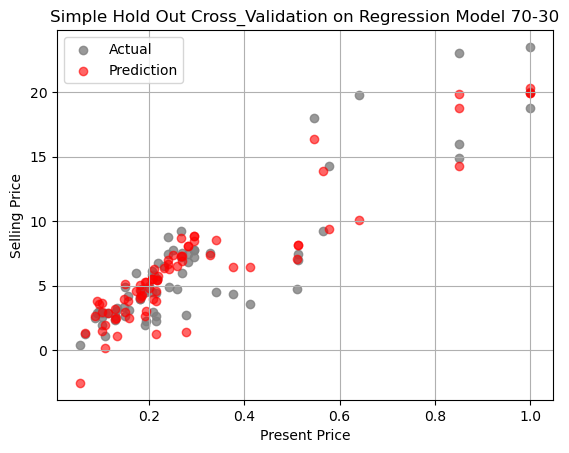

In [179]:
y_pred11 = model_cv.predict (x_test11)
plt.scatter (x_test11.Present_Price, y_test11, color='gray', alpha = 0.8)
plt.scatter (x_test11.Present_Price, y_pred11 , color='red', alpha = 0.6)
plt.xlabel ('Present Price')
plt.ylabel ('Selling Price')
plt.title ('Simple Hold Out Cross_Validation on Regression Model 70-30')
plt.legend(['Actual', 'Prediction'])
plt.grid ()
plt.show()


# Finalizing the Regression Prediction Model 

In [96]:
DF                                            # geting new data and predicting 

,Age_Car,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,5.0,2014.0,5.59,27000.0,2.0,2.0,2.0,1.0,3.35
1,6.0,2013.0,9.54,43000.0,3.0,2.0,2.0,1.0,4.75
2,2.0,2017.0,9.85,6900.0,2.0,2.0,2.0,1.0,7.25
3,8.0,2011.0,4.15,5200.0,2.0,2.0,2.0,1.0,2.85
4,5.0,2014.0,6.87,42450.0,3.0,2.0,2.0,1.0,4.60
...,...,...,...,...,...,...,...,...,...
296,3.0,2016.0,11.60,33988.0,3.0,2.0,2.0,1.0,9.50
297,4.0,2015.0,5.90,60000.0,2.0,2.0,2.0,1.0,4.00
298,10.0,2009.0,11.00,87934.0,2.0,2.0,2.0,1.0,3.35
299,2.0,2017.0,12.50,9000.0,3.0,2.0,2.0,1.0,11.50


In [97]:
DataF2 = pd.DataFrame ({"Age_Car": [10.0],                        # The asked input data 
                        "Year": [2009],
                       "Present_Price": [11.23],
                       "Kms_Driven": [42000.0],
                        "Fuel_Type": [2.0],
                        "Seller_Type": [2.0],
                        "Transmission": [2.0],
                        "Owner": [1.0],
                        "Selling_Price": [2.0]})
DataF2                                     

,Age_Car,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,10.0,2009,11.23,42000.0,2.0,2.0,2.0,1.0,2.0


In [98]:
DataF3 = pd.concat([DF, DataF2], ignore_index=True)   # Addition of the new data to the previous dataset (With target)
DataF3

,Age_Car,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,5.0,2014.0,5.59,27000.0,2.0,2.0,2.0,1.0,3.35
1,6.0,2013.0,9.54,43000.0,3.0,2.0,2.0,1.0,4.75
2,2.0,2017.0,9.85,6900.0,2.0,2.0,2.0,1.0,7.25
3,8.0,2011.0,4.15,5200.0,2.0,2.0,2.0,1.0,2.85
4,5.0,2014.0,6.87,42450.0,3.0,2.0,2.0,1.0,4.60
...,...,...,...,...,...,...,...,...,...
295,4.0,2015.0,5.90,60000.0,2.0,2.0,2.0,1.0,4.00
296,10.0,2009.0,11.00,87934.0,2.0,2.0,2.0,1.0,3.35
297,2.0,2017.0,12.50,9000.0,3.0,2.0,2.0,1.0,11.50
298,3.0,2016.0,5.90,5464.0,2.0,2.0,2.0,1.0,5.30


In [141]:
train = DataF3.iloc[:299]                        # slicing for training vs. testing data 
test = DataF3.iloc[299:]
x__train = DataF3[['Age_Car','Present_Price', "Fuel_Type", "Seller_Type", 'Transmission']][:299]
y__train = DataF3 ['Selling_Price'][:299].values.reshape (-1,1)
x__test = DataF3[['Age_Car','Present_Price', "Fuel_Type", "Seller_Type", 'Transmission']][299:]
regressor12.fit (x__train, y__train)
y__pred = regressor12.predict (x__test)
print (y__pred)                             # the predicted selling price for the asked car 

[[4.378353]]


# Writting a prompt that takes features from operator and gives the Selling_Price for Car

In [167]:
regressor12.coef_

array([[ -5.9233662 ,  25.99964915, -16.4892908 ,  -4.98086373,
         -0.04915503,   0.56375365,  -4.71053394,  24.95155398]])

In [169]:
age_input = float(input("The Age of the car?"))                   # Ask operator for any input to get the car price 
price_input = float(input("The present price of the car?"))
fuel_input = float(input("The fuel type of the car? insert 2 (if Petrol), insert 3 (if Diesel), insert 4 (if CNG)"))
seller_input = float(input("The seller type of the car? insert 2 (if Dealer), insert 3 (if Individual)"))
trans_input = float(input("The Transmission system of the car? insert 2 (if Manual), insert 3 (if Automatic)"))

def custom_min_max_scaler(min_val, max_val, x):                   # A function to normalize the input data 
    """
    Custom Min-Max scaling function. 
    
    Args:
    - min_val (float): Minimum value of the column.
    - max_val (float): Maximum value of the column.
    - x (float): Input value to be normalized.
    
    Returns:
    - Normalized value of x.
    """
    return (x - min_val) / (max_val - min_val)

norm_Age = custom_min_max_scaler(1.0, 16.0, age_input)            # Normalizing the data having Min-Max values of features  
norm_Price = custom_min_max_scaler(0.32, 35.96, price_input)
norm_fuel = custom_min_max_scaler(2.0, 4.0, fuel_input)
norm_seller = custom_min_max_scaler(2.0, 3.0, seller_input)
norm_trans = custom_min_max_scaler(2.0, 3.0, trans_input)

# Writing the regression function for geting the prediction

selling_price = 1.92275561 + (-5.9233662 * norm_Age) + (25.99964915 * norm_Price) + \
               (-16.4892908 * (norm_Price)**2) + (-4.98086373 * norm_fuel) + \
               (-0.04915503 * norm_seller) + (0.56375365 * norm_trans) + \
               (-4.71053394 * norm_Price * norm_seller) + \
               (24.95155398 * norm_Price * norm_fuel)
                
print ('The selling price is:', selling_price)


The Age of the car?10
The present price of the car?11.23
The fuel type of the car? insert 2 (if Petrol), insert 3 (if Diesel), insert 4 (if CNG)2
The seller type of the car? insert 2 (if Dealer), insert 3 (if Individual)2
The Transmission system of the car? insert 2 (if Manual), insert 3 (if Automatic)2
The selling price is: 4.782493921651612
